<div align='center' ><font size='5'>浙江工商大学2022/2023学年第一学期考试试卷(A)</font></div>



课程名称： **Python在金融中的应用**    考试方式：**独立作业**

班级名称：__普惠金融2102 _____     学号：__2136010208____      姓名： __陈鑫杰____  

| 题号 | 一   | 二   | 三   | 四   | 合计 |
| ---- | ---- | ---- | ---- | ---- | ---- |
| 满分 | 20   | 25   | 25   | 30   | 100  |
| 得分 |      |      |      |      |      |



**注意事项：**

1. 请大家务必独立完成，独立大作业视作考试，请不要抄袭。

2. 判分会综合考虑代码和运行结果，因此如果运行结果发生问题，可以仅提供代码。注意：没有代码过程的结果不给分。

3. 请给代码加上注释，如果发生代码结果错误，但可以读懂代码并有充分的注释，将会酌情给分。

4. 作图的结果请不要用截图，数据显示请不要选择显示全部。 

5. 在完成作业要求的基础上，鼓励大家根据自己的理解做适当的拓展。

6. 请大家注意版面的整洁和清晰程度。电子版务必转成pdf格式(在浏览器中使用Ctrl+P即可完成打印到PDF)。 

    

   **作业最晚提交时间： 待定   届时烦请每个班派一位代表联系我，将纸质版和电子版的作业交至我处。**

**作业一：**

1.1 注册[Tushare](https://tushare.pro/)网站，获取个人的token和120积分（注册成功有100积分、然后修改个人信息有20积分），可参阅[此处](https://tushare.pro/document/1?doc_id=37)了解如何注册并获取token（应该在课堂上完成该步骤，故不计分）。
请使用你的token，下载当前所有正常上市交易的股票列表，将其放到一个dataframe之中，并剔除**上市日期晚于2000年的所有股票**。（5%）

In [753]:
import tushare as ts
import pandas as pd
pro = ts.pro_api('46708f3172aa85c83007d11d4b6a719d5cffaf31cc62f2f2b5448240')

# 拉取数据
df = pro.query('stock_basic', exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
df['list_date']=df['list_date'].astype(int)
df=df.drop(df[df['list_date']>20200000].index)
df=df.reset_index(drop=True)


#查询当前所有正常上市交易的股票列表
# 请填入你的代码，以及必要的注释

1.2 请使用`numpy`中的`numpy.random.randint()`的函数（注意可能需要使用`size`参数），在上题中取得的A股数据中随机选取20个股票，并将其从2020年1月1日至2022年12月20日的每日收盘价数据收集起来。(5%)

In [754]:
import numpy as np
array=np.random.randint(0,df.shape[0],size=20)
resdf=pd.DataFrame()
for i in range(20):
    tmpdf=pro.daily(ts_code=df.loc[array[i],'ts_code'],fields='close,trade_date,ts_code')

    tmpdf['trade_date']=tmpdf['trade_date'].astype(int)

    tmpdf=tmpdf.drop(tmpdf[tmpdf['trade_date']<20200000 ].index)
    tmpdf=tmpdf.drop(tmpdf[tmpdf['trade_date']>20230000 ].index)
    tmpdf=tmpdf.iloc[::-1]
    tmpdf=tmpdf.reset_index(drop=True)
    ts_code=tmpdf.loc[0,'ts_code']
    tmpdf.index=tmpdf['trade_date']
    del tmpdf['ts_code']
    del tmpdf['trade_date']
    tmpdf.columns=[ts_code]
    resdf=pd.concat([resdf,tmpdf],axis=1,join='outer')
resdf
# 请填入你的代码，以及必要的注释

,600052.SH,002267.SZ,300572.SZ,300398.SZ,300536.SZ,600426.SH,601111.SH,002766.SZ,300752.SZ,600179.SH,002431.SZ,300719.SZ,600730.SH,002187.SZ,600031.SH,300140.SZ,600328.SH,000513.SZ,000680.SZ,300451.SZ
trade_date,,,,,,,,,,,,,,,,,,,,
20200102,4.60,7.22,49.98,15.22,7.50,20.56,9.80,3.30,28.98,4.50,3.10,12.06,5.03,8.66,17.95,10.80,8.29,33.62,3.70,17.86
20200103,4.58,7.24,50.35,15.17,7.71,20.52,9.49,3.36,28.83,4.63,3.11,12.41,5.04,8.58,17.75,11.17,8.28,33.80,3.68,17.76
20200106,4.57,7.35,51.15,15.45,7.64,20.69,9.12,3.35,29.30,4.79,3.12,12.35,5.03,8.75,17.17,11.08,8.27,33.51,3.64,17.93
20200107,5.03,7.33,53.14,15.30,7.66,20.59,9.30,3.52,29.36,5.03,3.16,12.33,5.13,8.86,17.19,11.05,8.35,34.00,3.69,18.18
20200108,5.14,7.24,52.99,14.63,7.40,20.76,9.05,3.70,29.01,5.02,3.10,13.27,4.98,8.76,16.89,10.68,8.19,34.10,3.60,18.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221229,5.35,7.19,11.37,17.03,15.17,33.16,10.52,5.18,16.80,3.21,2.96,11.12,6.05,8.24,15.66,7.24,14.78,33.03,4.09,7.74
20221230,5.46,7.21,11.45,17.17,14.51,33.15,10.60,5.06,16.81,3.29,2.92,11.31,6.19,8.61,15.80,7.31,14.69,32.48,4.13,7.91
20210625,NaN,6.93,32.40,19.66,13.72,32.68,8.16,4.38,17.45,4.13,2.95,15.59,4.36,8.05,29.11,6.67,13.05,51.90,3.91,11.67


1.3 请将20个股票的**收盘价**信息置入一个dataframe当中，每行的column head是股票的代码（i.e. 000001.SZ），index为每个交易日（最新的交易日收盘价在最后一行），每行的信息是20个股票的收盘价。如某一天因为任何情况导致其中一个或者几个股票没有收盘价，则**删除该日的所有股票的信息**，做到该dataframe没有空值（即便没有此类情况，也需在代码中体现去除空值的代码，否则将不能得到该部分的分数）。（10%）

In [755]:
# 请填入你的代码，以及必要的注释
resdf.dropna(axis=0,how='any',inplace=True)
resdf

,600052.SH,002267.SZ,300572.SZ,300398.SZ,300536.SZ,600426.SH,601111.SH,002766.SZ,300752.SZ,600179.SH,002431.SZ,300719.SZ,600730.SH,002187.SZ,600031.SH,300140.SZ,600328.SH,000513.SZ,000680.SZ,300451.SZ
trade_date,,,,,,,,,,,,,,,,,,,,
20200102,4.60,7.22,49.98,15.22,7.50,20.56,9.80,3.30,28.98,4.50,3.10,12.06,5.03,8.66,17.95,10.80,8.29,33.62,3.70,17.86
20200103,4.58,7.24,50.35,15.17,7.71,20.52,9.49,3.36,28.83,4.63,3.11,12.41,5.04,8.58,17.75,11.17,8.28,33.80,3.68,17.76
20200106,4.57,7.35,51.15,15.45,7.64,20.69,9.12,3.35,29.30,4.79,3.12,12.35,5.03,8.75,17.17,11.08,8.27,33.51,3.64,17.93
20200107,5.03,7.33,53.14,15.30,7.66,20.59,9.30,3.52,29.36,5.03,3.16,12.33,5.13,8.86,17.19,11.05,8.35,34.00,3.69,18.18
20200108,5.14,7.24,52.99,14.63,7.40,20.76,9.05,3.70,29.01,5.02,3.10,13.27,4.98,8.76,16.89,10.68,8.19,34.10,3.60,18.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221226,5.26,7.02,11.68,17.71,15.62,32.26,11.36,6.13,17.51,3.27,3.07,10.49,6.45,8.29,16.21,7.06,15.22,33.16,4.17,7.72
20221227,5.22,7.19,11.71,17.51,15.79,33.47,11.09,6.08,17.54,3.30,3.11,10.56,6.34,8.42,16.18,6.95,15.21,32.39,4.18,7.54
20221228,5.31,7.21,11.49,17.09,15.30,33.06,10.66,5.60,17.10,3.26,3.01,10.89,6.13,8.16,15.84,7.31,14.92,32.43,4.13,7.46


**作业二：**

1.1 使用作业一当中取得的20支股票的收盘价数据，将其转化成收益率。使用pandas中的`shift`函数，具体可以参看[官网介绍](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)（请不要使用pct_chg数据，但可以用来校对你生成的答案）（5%）

In [756]:
# 请填入你的代码，以及必要的注释
tmp=resdf.shift(periods=1)
profit=(resdf-tmp)/tmp*100
profit

,600052.SH,002267.SZ,300572.SZ,300398.SZ,300536.SZ,600426.SH,601111.SH,002766.SZ,300752.SZ,600179.SH,002431.SZ,300719.SZ,600730.SH,002187.SZ,600031.SH,300140.SZ,600328.SH,000513.SZ,000680.SZ,300451.SZ
trade_date,,,,,,,,,,,,,,,,,,,,
20200102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20200103,-0.434783,0.277008,0.740296,-0.328515,2.800000,-0.194553,-3.163265,1.818182,-0.517598,2.888889,0.322581,2.902156,0.198807,-0.923788,-1.114206,3.425926,-0.120627,0.535396,-0.540541,-0.559910
20200106,-0.218341,1.519337,1.588878,1.845748,-0.907912,0.828460,-3.898841,-0.297619,1.630246,3.455724,0.321543,-0.483481,-0.198413,1.981352,-3.267606,-0.805730,-0.120773,-0.857988,-1.086957,0.957207
20200107,10.065646,-0.272109,3.890518,-0.970874,0.261780,-0.483325,1.973684,5.074627,0.204778,5.010438,1.282051,-0.161943,1.988072,1.257143,0.116482,-0.270758,0.967352,1.462250,1.373626,1.394311
20200108,2.186879,-1.227831,-0.282273,-4.379085,-3.394256,0.825644,-2.688172,5.113636,-1.192098,-0.198807,-1.898734,7.623682,-2.923977,-1.128668,-1.745201,-3.348416,-1.916168,0.294118,-2.439024,-0.110011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221226,-0.378788,1.298701,1.565217,4.115226,5.114401,1.096835,1.067616,2.852349,4.787552,0.000000,10.035842,3.964321,-1.225115,0.000000,0.433705,2.467344,3.116531,0.729040,1.707317,0.390117
20221227,-0.760456,2.421652,0.256849,-1.129305,1.088348,3.750775,-2.376761,-0.815661,0.171331,0.917431,1.302932,0.667302,-1.705426,1.568154,-0.185071,-1.558074,-0.065703,-2.322075,0.239808,-2.331606
20221228,1.724138,0.278164,-1.878736,-2.398629,-3.103230,-1.224978,-3.877367,-7.894737,-2.508552,-1.212121,-3.215434,3.125000,-3.312303,-3.087886,-2.101360,5.179856,-1.906640,0.123495,-1.196172,-1.061008


1.2 使用pandas中的`cumsum`函数，具体可以参看[官网介绍](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html)，计算出该20支股票的累积收益率序列，并将20个最终的收益率由高到低排列，并使用函数`plot.bar`做柱形图表示（x轴为股票代码，柱子高度正比于累计收益率的大小），具体可以参看[官网介绍](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)。（10%）

<AxesSubplot:>

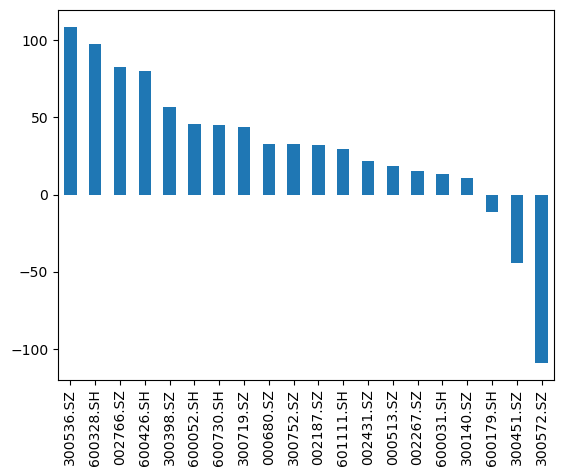

In [757]:
# 请填入你的代码，以及必要的注释
b=profit.cumsum()
a=b.loc[20221230].sort_values(axis=0,ascending=False)
a.plot.bar()


1.3 使用numpy的`std`的函数，将20个股票的日收益率的标准差求出，记做日波动率。并使用20个股票的平均日收益率除以每个股票的日波动率，记做非年化的夏普比例。取出该夏普比例最高的5个股票和最低的5个股票，将选出的10个股票的累积收益率作图（使用matplotlib函数做折线图，x轴为时间，y轴为累积收益率）。（10%）

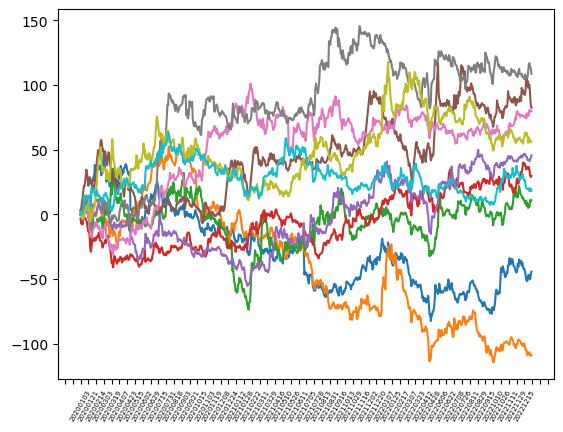

In [758]:
# 请填入你的代码，以及必要的注释
import matplotlib.pyplot as plt
from matplotlib import ticker
tmp=b.dropna(axis=0)
leng=len(tmp.index)
tmp.loc[len(tmp.index)]=tmp.values.std(axis=0)
tmp.loc[len(tmp.index)]=tmp.values.mean(axis=0)
tmp.loc[len(tmp.index)]=tmp.loc[len(tmp.index)-1]/tmp.loc[len(tmp.index)-2]
tmp=tmp.sort_values(by=len(tmp.index)-1,axis=1)
tmp=tmp.drop(tmp.columns[5:15],axis=1)
date=tmp.index[:leng]
array=np.array(date)
array=array.astype(str)
plt.plot(array,tmp.iloc[:leng,:],'-')
plt.xticks(rotation=60) 
plt.xticks(fontsize=5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(12))





**作业三：**

3.1 使用1.1中得到的所有A股市场的上市公司数据，提取所有**房地产**行业的上市公司，将上市公司根据上市地点的不同，做不同省份（或者直辖市）的柱状图。一个地区一个柱，柱子的长度代表该地区的公司数量。柱状图从左到右，降序排列。要求使用pandas的相应函数，也可以选用部分numpy以及matplotlib的函数。（10%）

<AxesSubplot:>

d:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28145 (\N{CJK UNIFIED IDEOGRAPH-6DF1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22323 (\N{CJK UNIFIED IDEOGRAPH-5733}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\lib\site-packages\IPython\core\pylabt

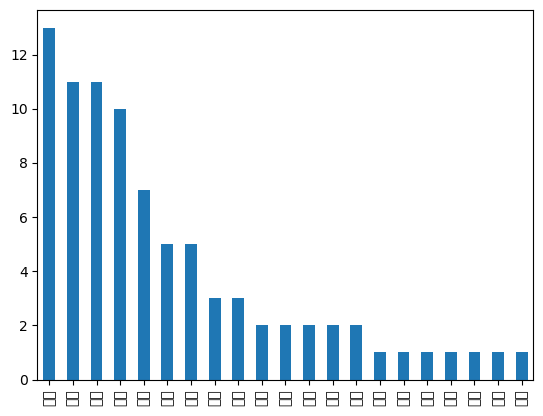

In [759]:
# 请填入你的代码，以及必要的注释
df2=df[(df['industry']=='全国地产') | (df['industry']=='区域地产')]
df2=df2.reset_index()
res=df2['area'].value_counts()
res.plot.bar()

3.2 利用3.1的数据，将所有房地产行业的上市公司根据上市时间进行排列。使用子图的形式，做两张图。第一张是上市时间分布，即在每年各有多少家房地产行业的公司上市；第二张是累积上市公司数量的分布，即截止到每一年底，全国共有多少家房地产行业的上市公司。要求使用pandas的相应函数，也可以选用部分numpy以及matplotlib的函数。（10%）

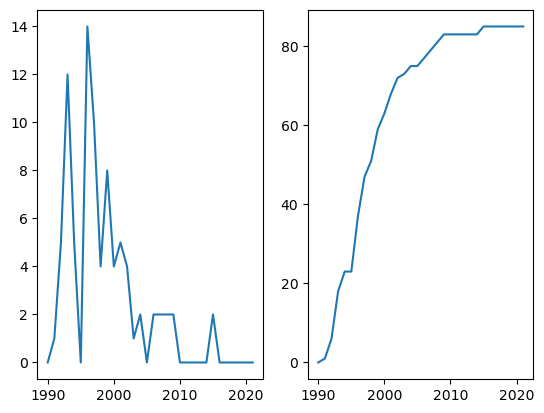

In [760]:
# 请填入你的代码，以及必要的注释
a=pd.Series(index=range(19900000,20220000,10000),data=0)

for i in range(19900000,20220000,10000):
    s=df2[(df2['list_date']>i) & (df2['list_date']<i+10000)].value_counts()
    a.iloc[(i-19900000)//10000]=s.values.sum()
plt.subplot(1,2,1)
plt.plot(a.index/10000,a.values)
b=a.cumsum()
plt.subplot(1,2,2)
plt.plot(b.index/10000,b.values)


3.3 根据matplotlib课程的最后一个例子，任选5个城市，10个年份，做出一个三维图像，即每一年份，房地产行业上市公司的数量在5个城市的分布情况。也可以选用`plotly`包中的[函数](https://plotly.com/python/3d-charts/) （5%）

In [761]:
# 请填入你的代码，以及必要的注释
from mpl_toolkits.mplot3d import Axes3D
x=res.index[0:5]
y=np.arange(1990,2000)
X,Y=np.meshgrid(x,y)


**作业四：**

4.1 使用matplotlib的相应函数，做出一张图，其中包含2*2共4张子图，每张图为一个股票的收盘价走势。(1.1 中的股票任选)（10%）

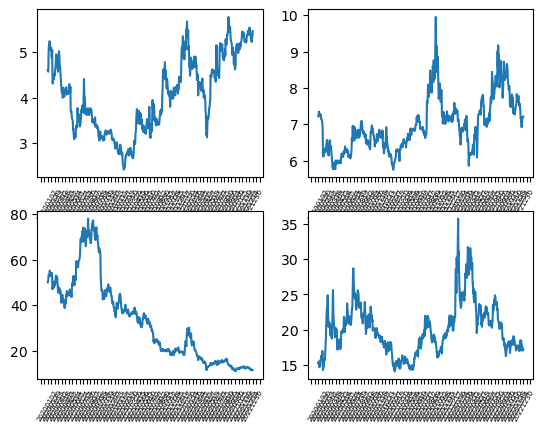

In [762]:
# 请填入你的代码，以及必要的注释
plt.subplot(2,2,1)
array=np.array(resdf.index)
array=array.astype(str)
plt.plot(array,resdf.iloc[:,0].values)
plt.xticks(rotation=60) 
plt.xticks(fontsize=5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(12))
plt.subplot(2,2,2)
array=np.array(resdf.index)
array=array.astype(str)
plt.plot(array,resdf.iloc[:,1].values)
plt.xticks(rotation=60) 
plt.xticks(fontsize=5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(12))
plt.subplot(2,2,3)
array=np.array(resdf.index)
array=array.astype(str)
plt.plot(array,resdf.iloc[:,2].values)
plt.xticks(rotation=60) 
plt.xticks(fontsize=5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(12))
plt.subplot(2,2,4)
array=np.array(resdf.index)
array=array.astype(str)
plt.plot(array,resdf.iloc[:,3].values)
plt.xticks(rotation=60) 
plt.xticks(fontsize=5)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(12))


4.2 使用numpy和matplotlib的相应函数，计算5个股票（使用收盘价）的日收益率，并做出5个股票收益率之间的相关性，将其协方差矩阵通过热力图（`imshow`或者`sns.heatmap`）来展现。（10%）

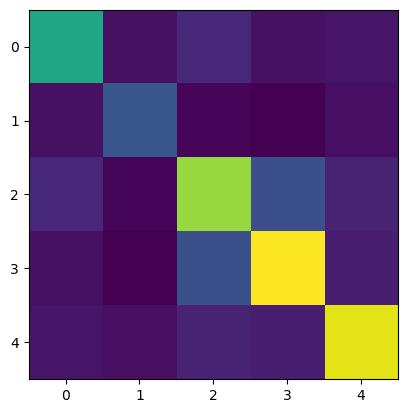

In [763]:
# 请填入你的代码，以及必要的注释
profit=profit.dropna()
arr0=profit.values[:,0:5].T
mat=np.cov(arr0)
plt.imshow(mat)

4.3 通过计算累积收益率，在所有的股票当中，选取2022年（仅一年）表现最好的5个股票（即累积收益率最高）。将该5个股票在2022年的每日收益率放入一张表单，列名为股票代码，每一行代表每一天的日收益率，无数据的日子填入na，最后将该表格存储成`top5stock.csv`文件（10%）

In [764]:
# # 请填入你的代码，以及必要的注释
for i in range(profit.shape[0]):
    if profit.index[i]>20220000:
        va=i
        break


profit.drop(profit.index[0:va],inplace=True)
a=profit.cumsum()
profit.loc['sum']=profit.apply(lambda x:x.sum())
profit.sort_values(by= 'sum',axis=1,ascending=False, inplace=True)
csv=profit.iloc[:-1,0:5]
csv.to_csv('top5stock.csv')

C:\Users\Epiphany\AppData\Local\Temp\ipykernel_15432\2053021605.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit.drop(profit.index[0:va],inplace=True)
C:\Users\Epiphany\AppData\Local\Temp\ipykernel_15432\2053021605.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit.loc['sum']=profit.apply(lambda x:x.sum())
C:\Users\Epiphany\AppData\Local\Temp\ipykernel_15432\2053021605.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co